<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# load và xử lí data
 
url = 'http://cs.uit.edu.vn/data3.txt'
 
Dataset = np.loadtxt(url , delimiter = ',')
 
# chia dataset thành 2 phần X (feature) và Y(label)
X = Dataset[:,np.newaxis:1]
Y = Dataset[:,1:np.newaxis]
 
 # chia dữ liệu thành 2 phần train và test
X_train , X_test, Y_train, Y_test = train_test_split(X_new,Y,test_size = 0.9, random_state = 1)


In [36]:
import math

X_pow = X**2
X_log_List = []
for i in range(len(X)):
  temp = X[i][0]*math.log(X[i][0])
  X_log_List.append(temp)

X_log = np.array(X_log_List).reshape(-1,1)

X_new = np.array([X,X_pow,X_log])

print(X_pow.shape)


(10590, 1)


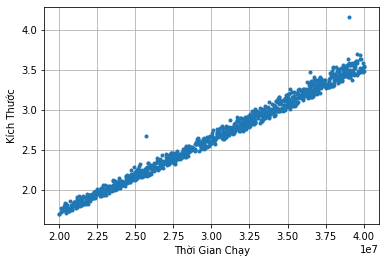

In [27]:
# quan sát dữ liệu train
plt.plot(X_train,Y_train,'.')
 
plt.xlabel("Thời Gian Chạy")
plt.ylabel("Kích Thước")
 
plt.grid()
plt.show()

In [0]:
# xây dựng và đánh giá model
 
my_model = LinearRegression().fit(X_train,Y_train)
result = my_model.predict(X_test)

In [29]:
# Đánh giá model 
print("Hệ số w: " , my_model.coef_)
print("MSE : " , mean_squared_error(Y_test,result))
print("Độ chính xác: " , r2_score(Y_test,result))

Hệ số w:  [[9.27776805e-08]]
MSE :  0.003448400793504245
Độ chính xác:  0.9880894311987796


# ***Độ chính xác giảm xuống so với round 2***

# ***có thể thấy ngay dưới đồ thị thì dữ liệu nó không fit như round 2 lên tỉ lệ chính xác đã giảm xuống ***

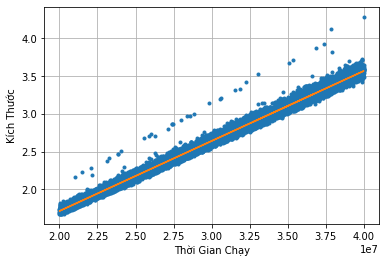

In [30]:
# Đồ thị kết quả 
plt.plot(X_test,Y_test,'.',
         X_test,result,'-')
 
 
plt.xlabel("Thời Gian Chạy")
plt.ylabel("Kích Thước")
 
plt.grid()
plt.show()